## Denoiser Autoencoder

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import ops as K
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras.models import Model


In [3]:
	
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [13]:
	# Define the corruption process
	
def corruption_process(X):
    epsilon = np.zeros_like(X)
    epsilon += np.random.normal(0,0.1,size=X.shape)
    X_tilde = X +  epsilon 
    X_tilde = np.clip(X_tilde,0.,1.)

    return X_tilde


## Model Definition

In [6]:
# Hiperparametros
original_dim = len(x_train[0])
intermediate_dim = 128
latent_dim = 32

batch_size = 20
epochs = 5


encoderIn = Input(shape=(original_dim,))
encoder_inter = Dense(units=intermediate_dim)(encoderIn)
encoder_out = Dense(units=latent_dim)(encoder_inter)

decoder_inter = Dense(units=intermediate_dim)(encoder_out)
decoder_out = Dense(units=original_dim)(decoder_inter)

denoiser = Model(inputs=encoderIn, outputs=decoder_out)
	

2025-10-02 21:35:59.082199: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Corruption and Ajusting Processes 

In [14]:
X_tilde = corruption_process(x_train)
x_test_tilde = corruption_process(x_test)


denoiser.compile(optimizer='adam', loss=keras.losses.mean_squared_error) 
denoiser.fit(X_tilde, x_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test_tilde, x_test),
    verbose=2)

Epoch 1/5
3000/3000 - 16s - 5ms/step - loss: 0.0179 - val_loss: 0.0175
Epoch 2/5
3000/3000 - 11s - 4ms/step - loss: 0.0179 - val_loss: 0.0175
Epoch 3/5
3000/3000 - 12s - 4ms/step - loss: 0.0179 - val_loss: 0.0175
Epoch 4/5
3000/3000 - 12s - 4ms/step - loss: 0.0179 - val_loss: 0.0175
Epoch 5/5
3000/3000 - 12s - 4ms/step - loss: 0.0179 - val_loss: 0.0174


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


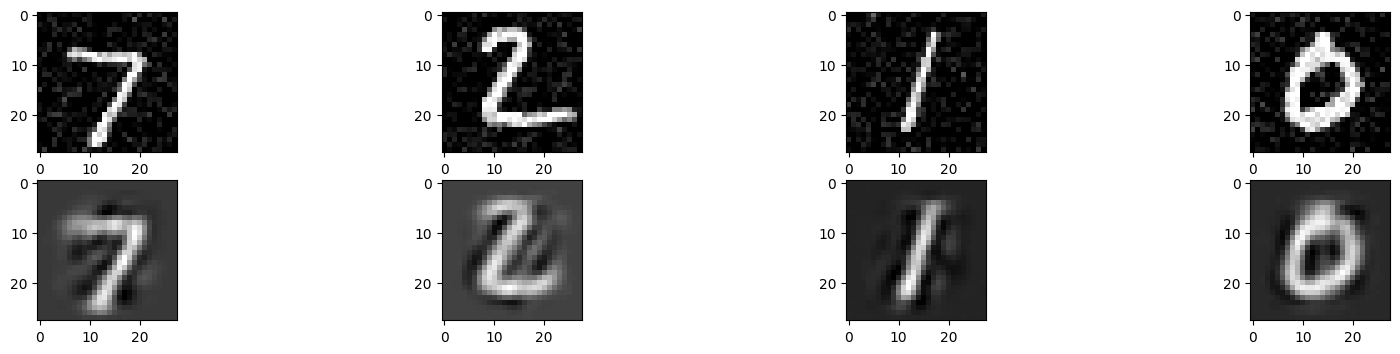

In [16]:
denoised_images = denoiser.predict(x_test_tilde)[:4]
clean_images = denoised_images[:4]


plt.figure(figsize=(20,4))
n = 4

for i in range(n):
	ax = plt.subplot(2,n,i+1)
	plt.imshow(x_test_tilde[i].reshape(28,28), cmap='gray') # noisy images


	ax = plt.subplot(2,n,i+n+1)
	plt.imshow(clean_images[i].reshape(28,28), cmap='gray') # denoised images

plt.show()